# Painel de indicadores para CS

### Este painel mostra o uso dos nossos clientes e ilustra com quais precisamos nos preocupar ou podemos fazer ações de marketing

Primeiramente iremos selecionar separar clientes de usinas e rodovias que queremos analisar. Também já iremos definir o período de análise

In [1]:
from datetime import datetime, timedelta
import pytz

days_ago = 30
road_companies = [
                 #Arteris
                 'Arteris Litoral Sul', 'Arteris Planalto Sul - Pav','Arteris Planalto Sul - Conserva',
                 'Arteris Régis Bittencourt', 'Arteris Fernão Dias',
                 'Arteris Via Paulista', 'Arteris Intervias','Arteris Fluminense',
                 #Pátria
                 'Entrevias', 'Eixo SP', 'CART',
                 #Neovia
                 'Neovia Alcinópolis', 'Neovia Bocaína do Sul 329/2018', 'Neovia Lages 652/2019', 'Neovia Tijucas', 
                 'Neovia CCR Rodonorte', 'Neovia - Vacaria', 'Neovia Coronel Vivida', 'Neovia Florianópolis',
                 'Neovia General Carneiro', 'Neovia Lev. BR277', "Neovia Pérola d'Oeste", 'Neovia - Planalto Sul',
                 'Neovia Rancho Queimado 080/2021', 'Neovia Regis', 'Neovia Chapecó', 'Neovia Araquari 886/2020'
                 #Dalba
                 'Dalba L14', 'Dalba L18',
                 #Fratello
                 'BR-174/MT Pontes e Lacerda', 'MT-220 Porto dos Gaúchos', 'Fratello MT-130 Paranatinga'
                 #VF Gomes
                 'VF Gomes - BR010', 'VF Gomes - BR158','VF Gomes - BR163',
                 #ELO CI
                 'ELO Rodovias Tietê', 'ELO Ecopistas', 'ELO Rodovias dos Tamoios', #'ELO Rota das Bandeiras', 'ELO SP Vias'
                 #ECORODOVIAS
                 'ECOPISTAS',
                'Castilho Umuarama', 'SinalTraffic - Parnaíba', 'SinalTraffic - Teresina'
                ]

date_to_use = (datetime.now()-timedelta(days=days_ago)).replace(tzinfo=pytz.timezone("America/Sao_Paulo"))
date_to_use2 = (datetime(2022, 8, 1)).replace(tzinfo=pytz.timezone("America/Sao_Paulo"))
date_to_use3 = (datetime(2022, 8, 31)).replace(tzinfo=pytz.timezone("America/Sao_Paulo"))

Agora iremos coletar os apontamentos que cada cliente criou e atualizou nos últimos 15 dias (separadamente)

In [2]:
created_reportings = Reporting.objects.filter(company__name__in=road_companies,
                                              created_at__gte=date_to_use
                                             ).prefetch_related("company", 'created_by')
updated_reportings = Reporting.objects.filter(company__name__in=road_companies,
                                              updated_at__gte=date_to_use).prefetch_related("company", 'updated_by')
jobs = Job.objects.filter(company__name__in=road_companies,
                                              start_date__gte=date_to_use).prefetch_related("company", 'updated_by')
print(created_reportings.count())

77011


Então rankeamos estes apontametnos por unidade ativa no sistema

In [4]:
created_reportings_ranking = (
    Company.objects.filter(reporting__in=created_reportings)
    .annotate(num_records=Count("reporting"))
    .order_by("-num_records")
)
updated_reportings_ranking = (
    Company.objects.filter(reporting__in=updated_reportings)
    .annotate(num_records=Count("reporting"))
    .order_by("-num_records")
)

jobs_ranking = (
    Company.objects.filter(job__in=jobs)
    .annotate(num_jobs=Count("job"))
    .order_by("-num_jobs")
)

In [8]:
created_reportings

<QuerySet [<Reporting: [Entrevias] ENT-AMP-2023.04273 - 2023-05-10 18:13:58.215000+00:00>, <Reporting: [Entrevias] ENT-AMP-2023.04277 - 2023-05-10 19:04:55.724000+00:00>, <Reporting: [CART] 45370.2023 - 2023-05-08 17:31:52.602000+00:00>, <Reporting: [Entrevias] ENT-LV-2023.26464 - 2023-05-01 03:00:00+00:00>, <Reporting: [Entrevias] ENT-LV-2023.26470 - 2023-05-01 03:00:00+00:00>, <Reporting: [Arteris Intervias] INT-PAVF-2023.05638 - 2023-04-18 11:59:53.942000+00:00>, <Reporting: [Arteris Intervias] INT-PAVF-2023.05639 - 2023-04-18 12:06:59.010000+00:00>, <Reporting: [Arteris Intervias] INT-PAVF-2023.05640 - 2023-04-18 12:14:48.214000+00:00>, <Reporting: [Arteris Intervias] INT-PAVF-2023.05641 - 2023-04-18 12:26:47.930000+00:00>, <Reporting: [Arteris Intervias] INT-PAVF-2023.05642 - 2023-04-18 12:28:02.358000+00:00>, <Reporting: [Arteris Intervias] INT-PAVF-2023.05643 - 2023-04-18 12:47:53.441000+00:00>, <Reporting: [Arteris Intervias] INT-PAVF-2023.05644 - 2023-04-18 16:24:48.821000+00:

## Apontamentos Criados e Atualizados

Agora podemos visualizar no gráfico quais clientes realizaram apontamentos nesse período


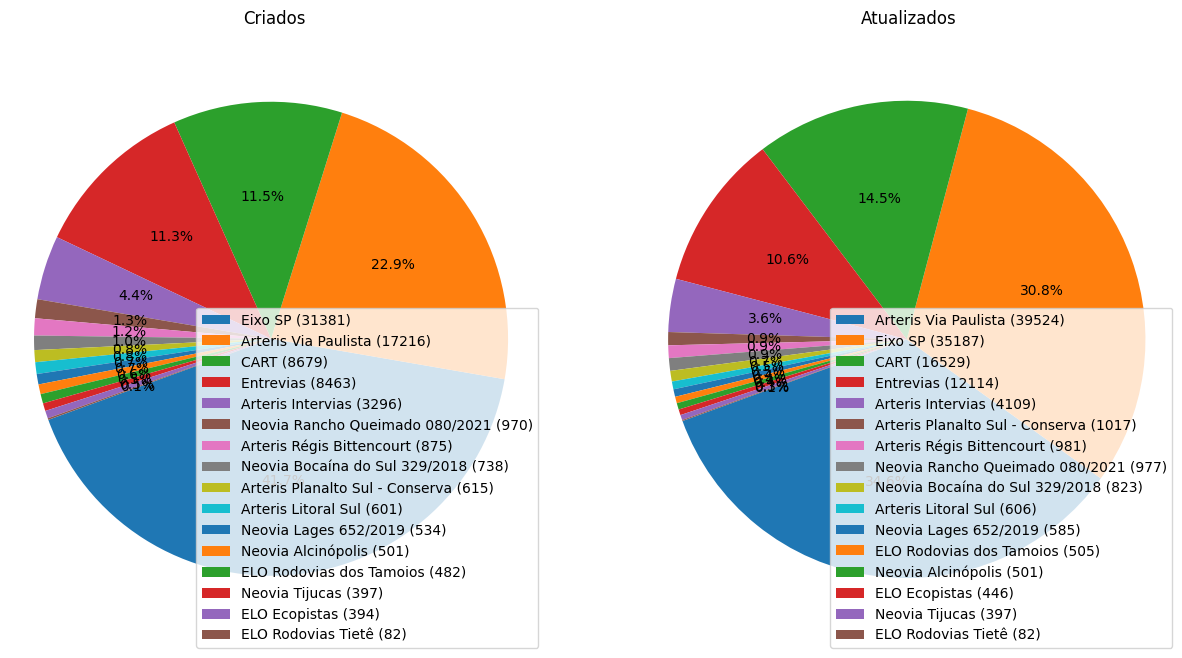

In [6]:
import matplotlib.pyplot as plt

# # Plot created reportings
labels_created = [company.name + " (" + str(company.num_records) + ")" for company in created_reportings_ranking]
sizes_created = [company.num_records for company in created_reportings_ranking]
labels_updated = [company.name + " (" + str(company.num_records) + ")" for company in updated_reportings_ranking]
sizes_updated = [company.num_records for company in updated_reportings_ranking]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8)) #ax1,ax2 refer to your two pies

ax1.pie(sizes_created, autopct='%1.1f%%',
        startangle=200)
ax1.legend(labels=labels_created,loc='lower right',borderaxespad=0.)
ax1.set_title('Criados')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie(sizes_updated, autopct='%1.1f%%',
        startangle=200)
ax2.legend(labels=labels_updated,loc='lower right',borderaxespad=0)
ax2.set_title('Atualizados')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## Programações Iniciadas

(-1.1021062190094095,
 1.132702393349961,
 -1.1104966966269971,
 1.118936576702262)

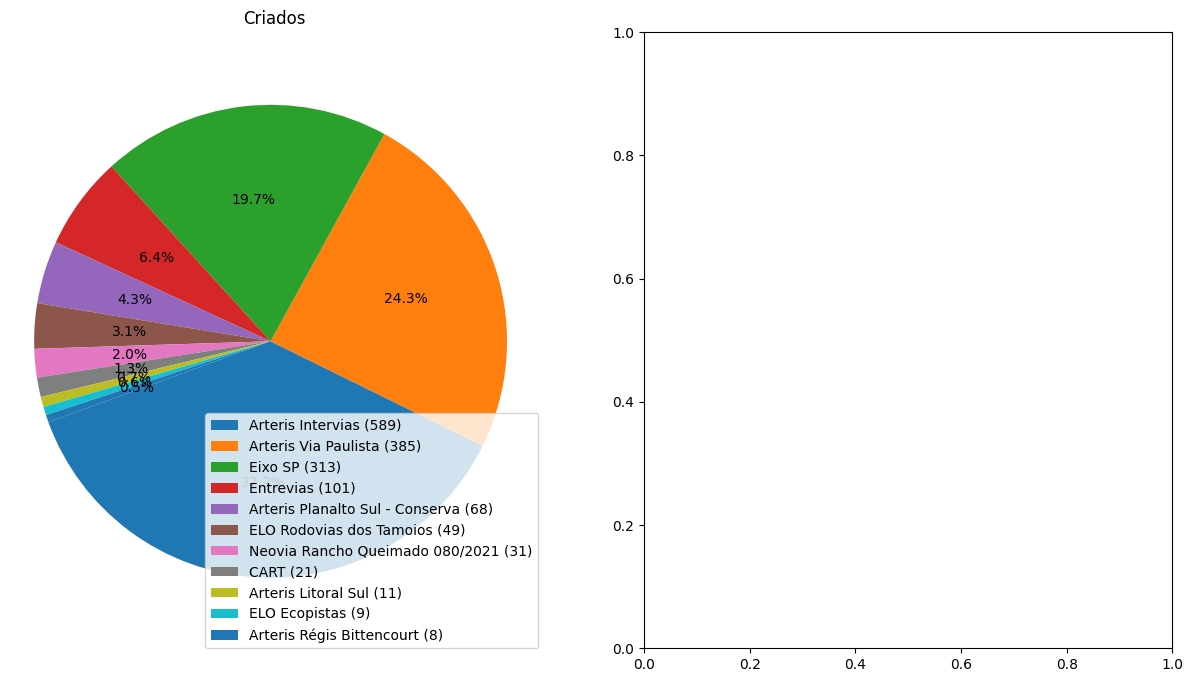

In [7]:
import matplotlib.pyplot as plt

# # Plot created reportings
labels_created = [company.name + " (" + str(company.num_jobs) + ")" for company in jobs_ranking]
sizes_created = [company.num_jobs for company in jobs_ranking]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8)) #ax1,ax2 refer to your two pies

ax1.pie(sizes_created, autopct='%1.1f%%',
        startangle=200)
ax1.legend(labels=labels_created,loc='lower right',borderaxespad=0.)
ax1.set_title('Criados')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

## Registros Criados e Atualizados

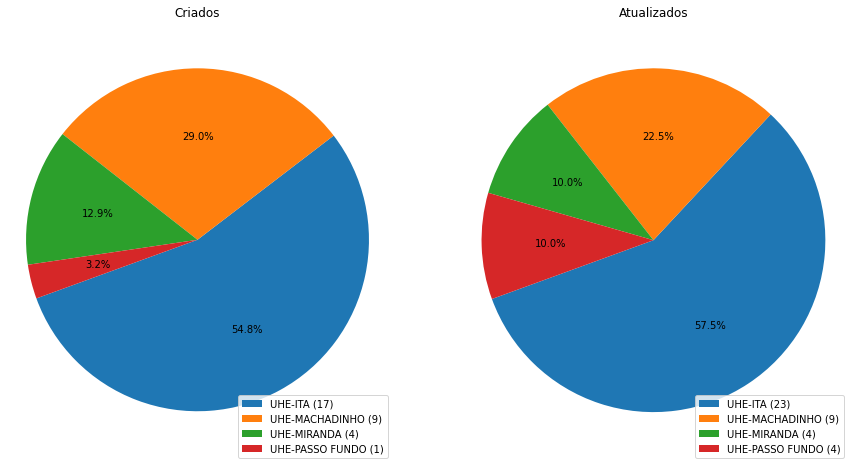

In [5]:
import matplotlib.pyplot as plt

# # Plot created reportings
labels_created = [company.name + " (" + str(company.num_records) + ")" for company in created_records_ranking]
sizes_created = [company.num_records for company in created_records_ranking]

labels_updated = [company.name + " (" + str(company.num_records) + ")" for company in updated_records_ranking]
sizes_updated = [company.num_records for company in updated_records_ranking]

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,8)) #ax1,ax2 refer to your two pies

ax1.pie(sizes_created, autopct='%1.1f%%',
        startangle=200)
ax1.legend(labels=labels_created,loc='lower right',borderaxespad=0.)
ax1.set_title('Criados')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie(sizes_updated, autopct='%1.1f%%',
        startangle=200)
ax2.legend(labels=labels_updated,loc='lower right',borderaxespad=0)
ax2.set_title('Atualizados')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()


## Usuários que mais utilizaram o sistema

Iremos agora calcular um termômetro do uso do sistema pelos usuários, também iremos rankear eles pela utilização do sistema. 

In [7]:
engagemment_objects = ['Reporting','OccurrenceRecord', 'Procedure', 'ProcedureResource',
                       'ServiceOrder', 'ServiceOrderResource', 'Job']

user_moves = []
for user in User.objects.all():
    num_moves = 0
    for item in engagemment_objects:
        num_moves += eval(item).history.filter(history_date__gt=date_to_use, history_user=user).count()
#     reporting = Reporting.history.filter(history_date__gt=date_to_use, history_user=user).count()
#     record = OccurrenceRecord.history.filter(history_date__gt=date_to_use, history_user=user).count()
#     procedure = Procedure.history.filter(history_date__gt=date_to_use, history_user=user).count()
#     procedure_resource = ProcedureResource.history.filter(history_date__gt=date_to_use, history_user=user).count()
#     service_order = ServiceOrder.history.filter(history_date__gt=date_to_use, history_user=user).count()
#     service_order_resource = ServiceOrderResource.history.filter(history_date__gt=date_to_use, history_user=user).count()
#     job = Job.history.filter(history_date__gt=date_to_use, history_user=user).count()
    user_moves.append((num_moves, user.email))


In [8]:
user_moves.sort(key=lambda tup: tup[0], reverse=True)
for user in user_moves[0:170]:
    print(user)
print(169/(User.objects.filter(date_joined__lte=date_to_use).count()-315),User.objects.filter(date_joined__lte=date_to_use).count())

(23263, 'matheus.santos@entrevias.com.br')
(14672, 'marcos@roadlabs.com.br')
(11319, 'caio.garcia@arteris.com.br')
(6676, 'diogo.santos.est@arteris.com.br')
(6071, 'planejamento@ampeng.com.br')
(5749, 'bruna.freitas@arteris.com.br')
(4688, 'rafael.peracoli@arteris.com.br')
(4460, 'douglas.rinaldi.est@arteris.com.br')
(3355, 'kaique.fahl@eixosp.com.br')
(3281, 'mario.oliveira@neoviaengenharia.com.br')
(3277, 'luiz.andrade.est@arteris.com.br')
(2706, 'leticia.carmo.est@arteris.com.br')
(2623, 'maycon.ferreira@entrevias.com.br')
(2398, 'alexandre.bassi@entrevias.com.br')
(2319, 'rogerio.santos@eixosp.com.br')
(2140, 'chrystian.moreira@arteris.com.br')
(2021, 'igor.goncalves@ampeng.com.br')
(1885, 'adriana.santos@eixosp.com.br')
(1869, 'salatecnica.ribeirao@cekconstrucoes.com.br')
(1837, 'Thyago.Sana@cartsp.com.br')
(1799, 'taynara.silva@eixosp.com.br')
(1716, 'filipe.lopes.ampeng@gmail.com')
(1710, 'atilio.coradine@eixosp.com.br')
(1632, 'eixosp.regional01@bc2.com.br')
(1620, 'guilherme.t

In [30]:
169/275

0.6145454545454545

In [10]:
companies = Company.objects.filter(name__in=road_companies)
for company in companies:
    print("\n\n")
    print(f'{company.name}\tEngajamento\n')
#     reportings = Reporting.objects.filter(company=company, updated_at__gte=date_to_use)

    engagemment_objects = ['Reporting', 'Job']
    user_exclude = ["rlcs","arteriscs","patriacs","vfcs","neoviacs","fratelocs","elocs","ecocs","dalbacs", "cartcs", "kapacs", "ampcs"]

    user_moves = []
    for user in User.objects.filter(companies=company).exclude(username__in=user_exclude):
        num_moves = 0
        for item in engagemment_objects:
            num_moves += eval(item).history.filter(history_date__gte=date_to_use2, history_date__lte=date_to_use3,history_user=user, company=company).count()
        user_moves.append((num_moves, user))

    user_moves.sort(key=lambda tup: tup[0], reverse=True)
    for user in user_moves[0:149]:
        print(f'{user[1].get_full_name()} \t {user[0]}')
    active_users = len([user for user in user_moves if user[0]>0])
    print(f'\nQuantidade de usuários: {len(user_moves)}\tPorcentagem de usuários ativos: {(active_users/len(user_moves))*100:.2f}%')




Neovia Rancho Queimado 080/2021	Engajamento

Otávio Araújo 	 919
Bruno Martins 	 50
Ricardo Mazuco 	 0
Osni Padilha 	 0
André Madruga 	 0
Gustavo Deschamps Vieira 	 0
Anderson Marangon 	 0
Huri Raimundo 	 0
André Costa 	 0
Guilherme Silva de Souza 	 0
Stephanie Ayumi 	 0

Quantidade de usuários: 11	Porcentagem de usuários ativos: 18.18%



Neovia - Vacaria	Engajamento

MATEUS LIMA 	 499
CELSO GUERRA 	 189
Anderson Matos 	 138
Vagner Dahmer 	 124
Cleisson Boeira 	 75
Ederson Camargo 	 31
DILMAR LIMA 	 3
LETICIA GOTZ 	 1
MAURICIO CHAGAS 	 1
Alequessandro Pereira de Carvalho 	 0
Sandro Moro 	 0
Ricardo Mazuco 	 0
MARCOS GARCIA 	 0
Mauro Rodrigues de Almeida 	 0
Rafael Kammers 	 0
Adenilso Tramontin 	 0
CONRADO ALMEIDA 	 0
ALESSANDRO PEREIRA 	 0
Conrado Almeida 	 0
Glaucio Moraes 	 0
FABIO . 	 0
Terceiro Mettler 	 0
DOUGLAS . 	 0
FABIANO RIBEIRO 	 0
ALEXANDRE SOUZA 	 0
Antonio Macedo 	 0
TERCEIRO GENÉRICO 	 0
Teste Fiscal Teste Fiscal 	 0
LUAN MUNCHEN 	 0
PATRICK SOARES 	 0
Gustavo Desc

Cleber Rodrigo Coronetti 	 149
Graziele Alves 	 123
Aleson de Almeida 	 10
Luis Henrique do Nascimento 	 2
teste terceiro 	 2
Wesley Dittrich 	 1
Bruno Franco 	 1
Mateus Wobeto 	 0
Danilo Gil 	 0
Jair Franzoni Filho 	 0
Josué Duarte de Tarso Pacheco 	 0
Juarez Cordeiro 	 0
João Langer 	 0
Cesar Souza 	 0
Jefferson Luis da Silva 	 0
Raissa Biavatti 	 0
Victor Guimaraes 	 0
Anderson Lacerda 	 0
Ana Carolina Rosa 	 0

Quantidade de usuários: 19	Porcentagem de usuários ativos: 36.84%



VF Gomes - BR158	Engajamento

Ronildo Ribeiro 	 203
Sebastiao Galvao 	 159
José Borges 	 96
Iago Monte Santos 	 0
Bruno Gomes 	 0
dnit teste 	 0
Jonicley Souza 	 0
Diego Souza 	 0
Isaias Silva 	 0
Thiago Arruda 	 0
Jhonanttans Deus 	 0
Thiago Cratiu 	 0

Quantidade de usuários: 12	Porcentagem de usuários ativos: 25.00%



Neovia Florianópolis	Engajamento

Gleicy Hipolito 	 0
Igor Ivan Araujo Mittanck 	 0
Rian Andriani 	 0
Mauricio Bispo 	 0
Diego Campos 	 0
Gabriel Silveira 	 0
Glaucio Moraes 	 0
Gustavo De




VF Gomes - BR163	Engajamento

Thales Gomes 	 0
Diego Souza 	 0
Adriano Fernandes 	 0
Erionaldo Costa 	 0
Jonicley Souza 	 0
Dheymy Correia 	 0
Carlos Daneil Borba Monteiro 	 0
Lucas Pinheiro 	 0

Quantidade de usuários: 8	Porcentagem de usuários ativos: 0.00%



CART	Engajamento

David Silva 	 2216
cleber caetano 	 1902
Thyago Sana 	 1316
marcelo piacenco 	 1212
leandro martins 	 849
debora sa 	 844
Vitor Marin 	 533
alvaro esposte 	 410
Larissa Gasparoto 	 375
Thiago Bombarda 	 345
Luciano Aparecido 	 319
Willian Oliveira 	 316
Integração KCOR 	 314
Rafael Lucas Oliveira 	 313
marcos barbosa 	 255
Matheus Araujo 	 252
Andersom Bacurau 	 237
Danilo Campos 	 224
matheus guedes 	 197
Michael Douglas 	 190
Emerson Silva 	 188
Rodrigo Silva 	 134
Luciano Moraes 	 125
Andre camargo 	 110
Geovani Bezerra 	 109
jonatas alves 	 103
Danilo Fabri 	 97
Vinicius biel 	 96
celso junior 	 93
Leandro Felipe 	 87
rafael cavalcante 	 80
rafael goncalves 	 68
Adimar Teodoro 	 56
Carlos Alberto 	 53
D

ZeroDivisionError: division by zero